<a href="https://colab.research.google.com/github/Anishkha-02/Projects/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from google.colab import files


uploaded = files.upload()


Saving ifood_df.csv to ifood_df.csv


In [3]:
data = pd.read_csv("ifood_df.csv")

In [4]:
# Display the first few rows of the dataset
data.head()

# Check for missing values
data.isnull().sum()

# Drop rows with missing values or impute them depending on the context
data.dropna(inplace=True)

In [7]:
# Check for duplicate records
duplicate_records = data.duplicated().sum()
if duplicate_records > 0:
    print("Number of duplicate records:", duplicate_records)
    # If duplicate records are found, you can either remove them or keep one instance, depending on the context
    data.drop_duplicates(inplace=True)
    print("Duplicate records removed.")
else:
    print("No duplicate records found.")


No duplicate records found.


In [11]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [15]:
# Check for unexpected values or inconsistencies in categorical columns
categorical_cols = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
                    'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master',
                    'education_PhD', 'AcceptedCmpOverall']
for col in categorical_cols:
    unique_values = data[col].nunique()
    print("Number of unique values in", col, ":", unique_values)
    print("Unique values in", col, ":", data[col].unique())

Number of unique values in marital_Divorced : 2
Unique values in marital_Divorced : [0 1]
Number of unique values in marital_Married : 2
Unique values in marital_Married : [0 1]
Number of unique values in marital_Single : 2
Unique values in marital_Single : [1 0]
Number of unique values in marital_Together : 2
Unique values in marital_Together : [0 1]
Number of unique values in marital_Widow : 2
Unique values in marital_Widow : [0 1]
Number of unique values in education_2n Cycle : 2
Unique values in education_2n Cycle : [0 1]
Number of unique values in education_Basic : 2
Unique values in education_Basic : [0 1]
Number of unique values in education_Graduation : 2
Unique values in education_Graduation : [1 0]
Number of unique values in education_Master : 2
Unique values in education_Master : [0 1]
Number of unique values in education_PhD : 2
Unique values in education_PhD : [0 1]
Number of unique values in AcceptedCmpOverall : 5
Unique values in AcceptedCmpOverall : [0 1 2 3 4]


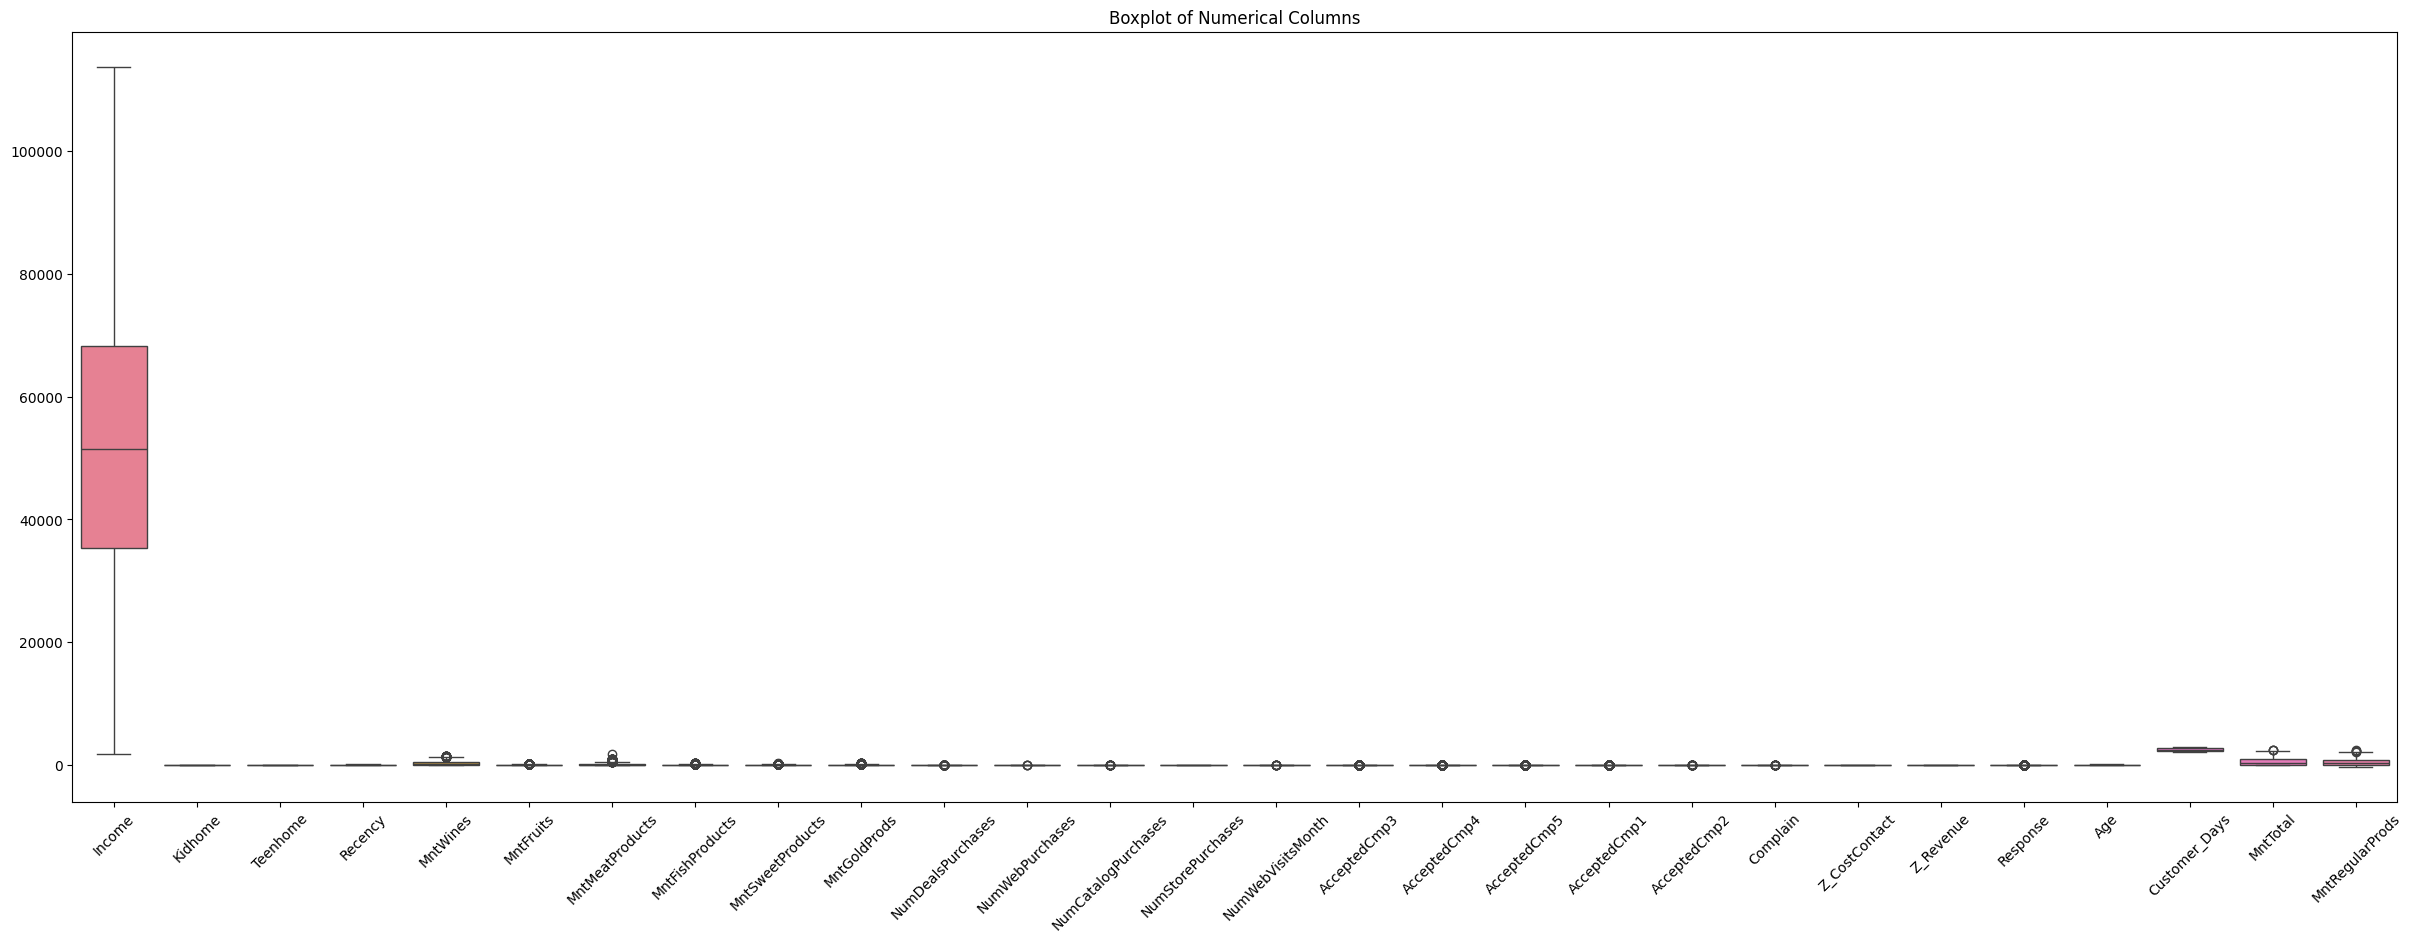

In [28]:
# Handle outliers
# Visualize outliers using box plots for numerical columns
from scipy import stats
numerical_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
                  'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue',
                  'Response', 'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds']
plt.figure(figsize=(30, 10))
sns.boxplot(data=data[numerical_cols])
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()



In [24]:
# Calculate z-scores for each numerical column
z_scores = np.abs(stats.zscore(data[numerical_cols]))

# Define a threshold for outlier detection
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Remove outliers or apply appropriate transformations
# For example, you can remove outliers by keeping only data points within a certain range:
cleaned_data = data[(z_scores < threshold).all(axis=1)]

In [31]:
# Calculate descriptive statistics
average_purchase_value = data['MntTotal'].mean()
print("Average purchase value =",average_purchase_value)
catalog_purchase_frequency = data['NumCatalogPurchases'].mean()
print("Catalog purchase frequency =",catalog_purchase_frequency)

Average purchase value = 563.789213260762
Catalog purchase frequency = 2.64473033151905


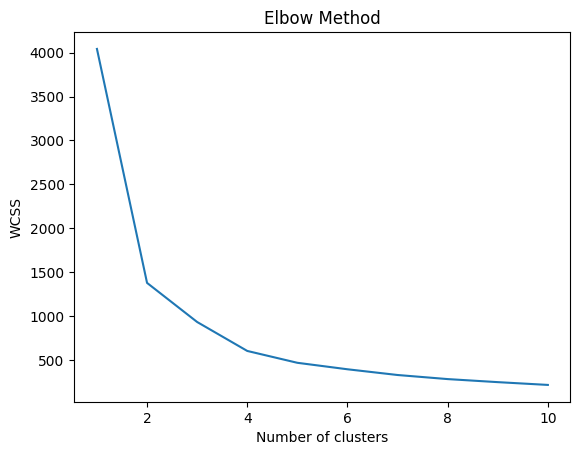

In [47]:
# Select relevant features for clustering
X = data[['MntTotal', 'NumStorePurchases']]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters and perform clustering
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

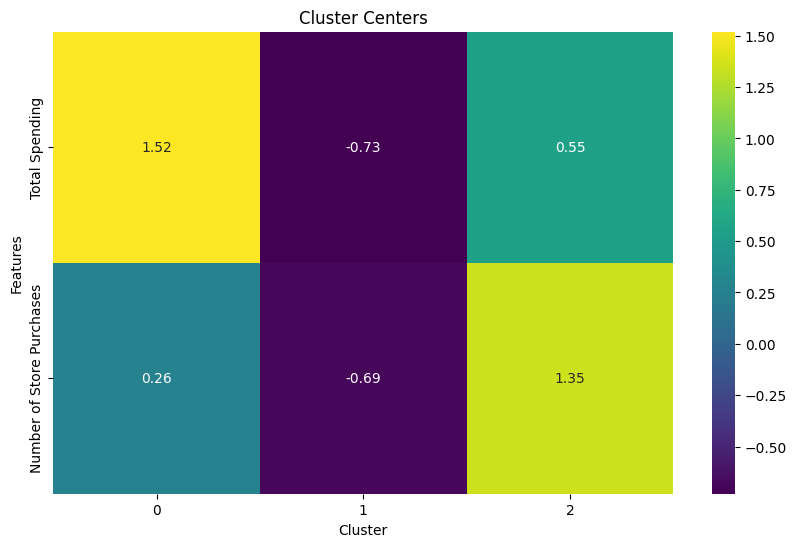

In [48]:
# Visualize clusters using a heatmap
plt.figure(figsize=(10, 6))

# Create a dataframe with cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Total Spending', 'Number of Store Purchases'])

# Create a heatmap
sns.heatmap(cluster_centers.T, annot=True, cmap='viridis', fmt=".2f")

plt.title('Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()

In [49]:
cluster_means = data.groupby('Cluster').mean()

# Print cluster means
print(cluster_means)

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        75018.494505  0.043956  0.307692  49.142857  738.332418  65.107143   
1        37926.854895  0.705420  0.522727  49.074301   81.493881   7.139860   
2        65818.510721  0.142300  0.623782  48.263158  501.830409  41.746589   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             479.997253        91.664835         64.859890     77.118132   
1              35.861888        10.874126          7.537587     24.034091   
2             233.649123        58.851852         44.596491     64.717349   

         ...  marital_Together  marital_Widow  education_2n Cycle  \
Cluster  ...                                                        
0        ...          0.247253       0.049451            0.057692   
1        ..